In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import entropy

# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
print(wine_data.head())

# General Analysis
# Statistical Properties
print(wine_data.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

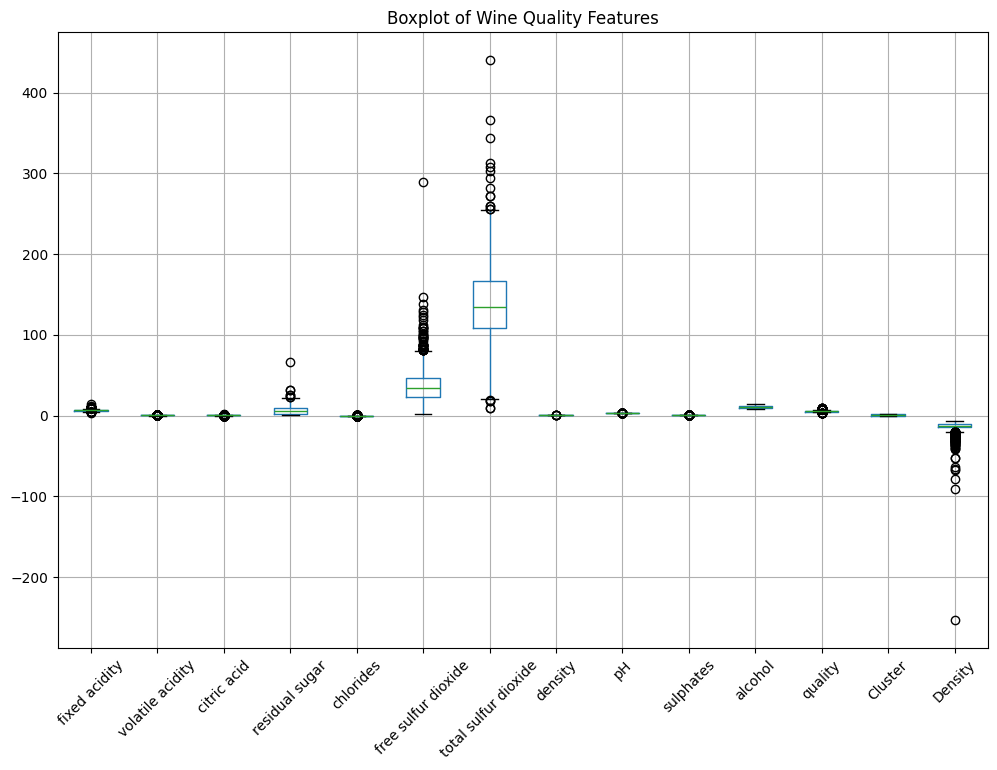

In [6]:
# Outliers Detection
# Visualize box plots for each feature
wine_data.boxplot(rot=45, figsize=(12, 8))
plt.title("Boxplot of Wine Quality Features")
plt.show()


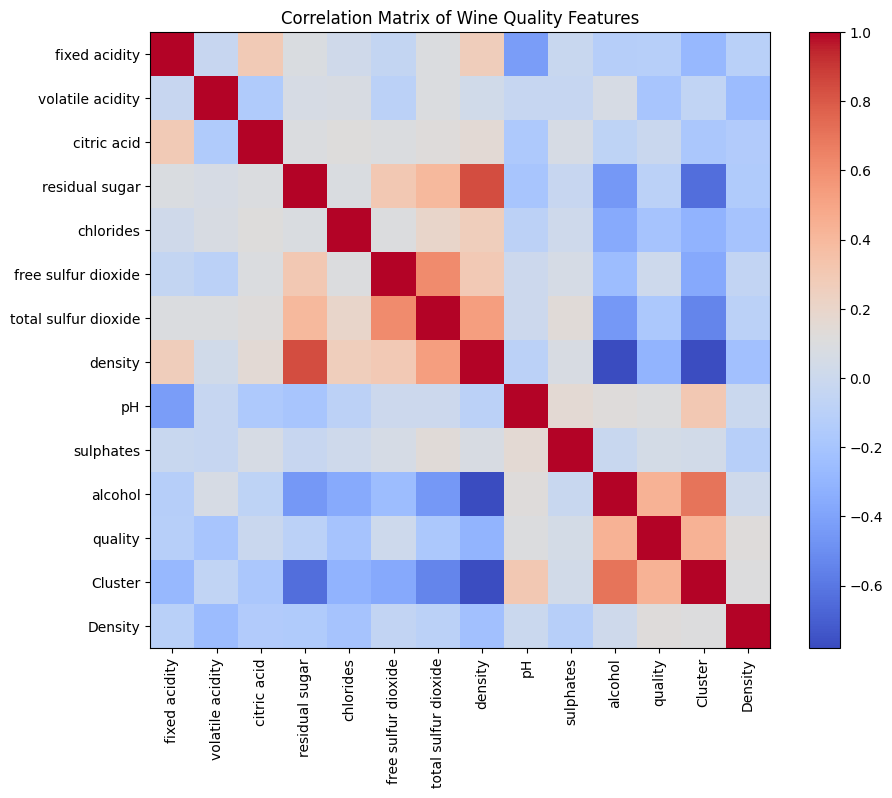

In [7]:

# Correlation Matrices
correlation_matrix = wine_data.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title("Correlation Matrix of Wine Quality Features")
plt.show()

C:\Users\gsim5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.17077408093337748


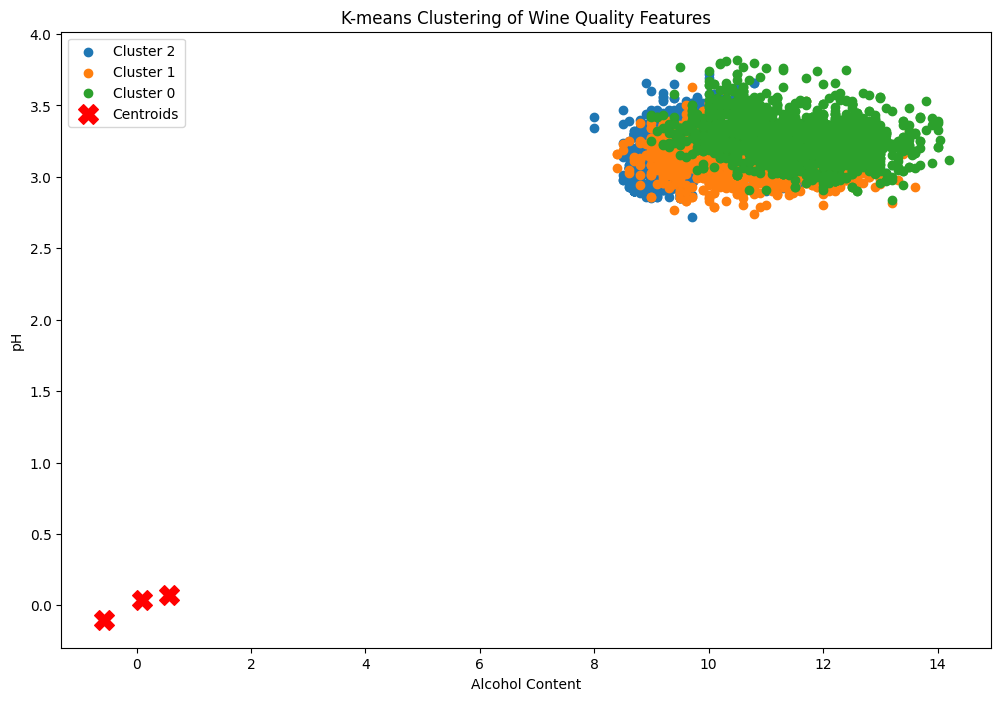

In [8]:
# Preprocessing
# Normalize the data
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_data)

# Unsupervised Learning - Clustering
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
wine_data['Cluster'] = kmeans.fit_predict(wine_data_scaled)

# Evaluation
silhouette_avg = silhouette_score(wine_data_scaled, wine_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clusters
plt.figure(figsize=(12, 8))
for cluster in wine_data['Cluster'].unique():
    cluster_data = wine_data[wine_data['Cluster'] == cluster]
    plt.scatter(cluster_data['alcohol'], cluster_data['pH'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering of Wine Quality Features")
plt.xlabel("Alcohol Content")
plt.ylabel("pH")
plt.legend()
plt.show()

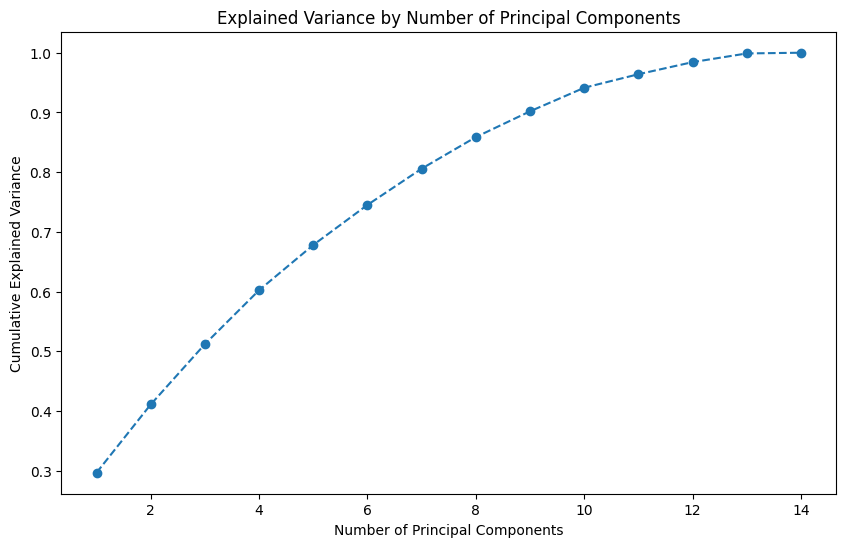

In [9]:
# Unsupervised Learning - Dimensionality Reduction
# PCA
pca = PCA()
pca_result = pca.fit_transform(wine_data_scaled)

# Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Visualize explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Explained Variance by Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

Kullbach Leibler Divergence: [inf inf inf ... inf inf inf]


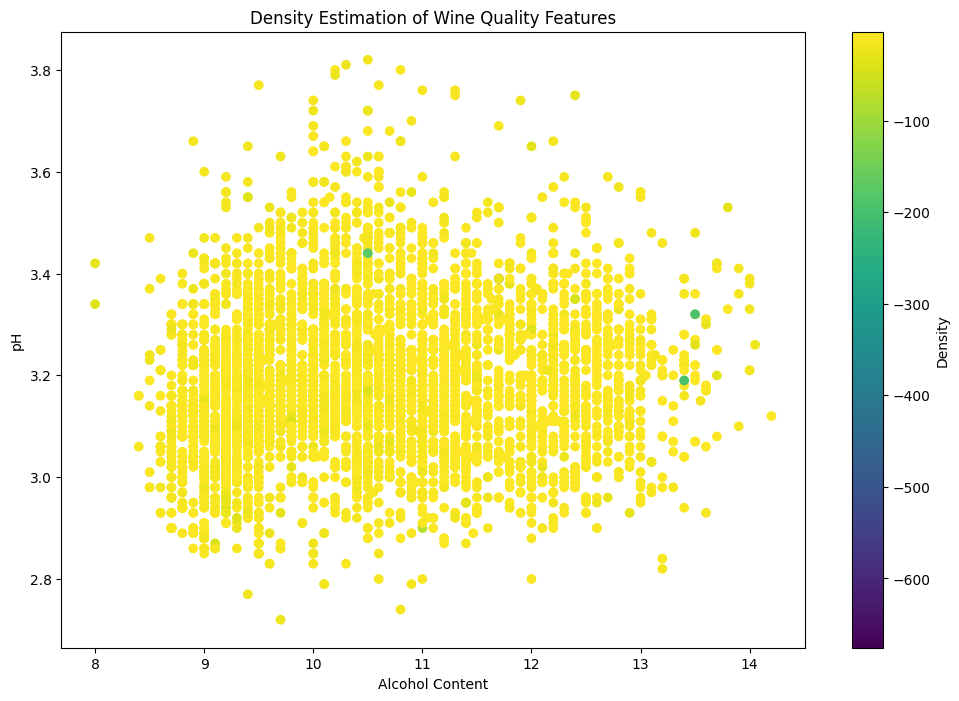

In [10]:
# Unsupervised Learning - Density Estimation
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(wine_data_scaled)
wine_data['Density'] = gmm.score_samples(wine_data_scaled)

# Evaluation
kl_divergence = entropy(wine_data_scaled.T, gmm.sample(len(wine_data_scaled))[0].T)
print(f"Kullbach Leibler Divergence: {kl_divergence}")

# Visualize the density estimation
plt.figure(figsize=(12, 8))
plt.scatter(wine_data['alcohol'], wine_data['pH'], c=wine_data['Density'], cmap='viridis', marker='o')
plt.colorbar(label="Density")
plt.title("Density Estimation of Wine Quality Features")
plt.xlabel("Alcohol Content")
plt.ylabel("pH")
plt.show()